## **Случайные леса.**
### *Обучение модели*

In [1]:
import json
import pandas as pd
import numpy as np
from pathlib import Path

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
path_root = Path('/home/owl/PycharmProjects/Questions_search_task')
work_dataset_for_forest = pd.read_csv(path_root / 'dataset_of_questions' /'work_dataset.csv', sep='\t')
work_dataset_for_forest = work_dataset_for_forest.drop('Unnamed: 0', axis=1)
work_dataset_for_forest.rename(columns={'Line informatation': 'line_information'}, inplace=True)


def class_return(sign):
    return 1 if sign == '?' else 0


work_dataset_for_forest['label'] = work_dataset_for_forest['Sign'].apply(class_return)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [4]:
fit_object_forest = TfidfVectorizer()
fit_object_forest.fit(work_dataset_for_forest['line_information'])

with open('fit_vectorizer', 'wb') as fit_file:
    pickle.dump(fit_object_forest, fit_file)

In [5]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(work_dataset_for_forest, work_dataset_for_forest['label'], test_size=0.3, random_state=0)

fit_data_forest = fit_object_forest.transform(train_data['line_information'])

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
param_test1 = {'max_deth': range(3,10,2), 'min_child_weight': range(1,6,2)}

gscv_object1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, 
                               n_estimators=140, 
                               max_depth=5, 
                               min_child_weight=1, 
                               gamma=0, 
                               subsample=0.8, 
                               colsample_bytree=0.8, 
                               objective= 'binary:logistic', 
                               nthread=4, 
                               scale_pos_weight=1, 
                               seed=27), 
                            param_grid = param_test1, scoring='f1_macro', n_jobs=6, cv=3)



In [8]:
# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_
gscv_object1.fit(fit_data_forest, train_label)


# print(f"grid_scores: {gscv_object1.grid_scores_}")
# print(f"Лучшие параметры: {gscv_object1.best_params_}")
# print(f"Лучшая оценка: {gscv_object1.best_score_}")

[01:53:12] WARNING: ../src/learner.cc:573: 
Parameters: { "max_deth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:53:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [9]:
gscv_object1.best_params_

{'max_deth': 3, 'min_child_weight': 1}

In [10]:
gscv_object1.best_score_

0.7726363398933592

In [11]:
test_transfrotm = fit_object_forest.transform(test_data['line_information'])

best_model = gscv_object1`.best_estimator_
predict_answer_f = best_model.predict(test_transfrotm)

In [12]:
from sklearn.metrics import roc_auc_score
rc_score_test = roc_auc_score(test_label, predict_answer_f)
print(rc_score_test)

0.776312061327965


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.88')

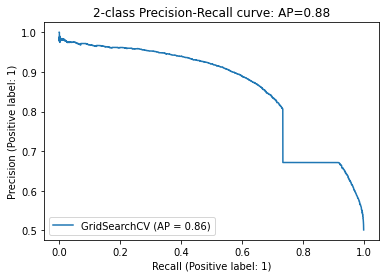

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(gscv_object1, test_transfrotm, test_label)
disp.ax_.set_title(f'2-class Precision-Recall curve: AP={0.88}')

In [14]:
from sklearn.metrics import classification_report


classification_assessment = classification_report(test_label, predict_answer_f, output_dict=True)

In [15]:
    classification_assessment

{'0': {'precision': 0.7214358572383264,
  'recall': 0.8998426914182215,
  'f1-score': 0.8008232564365713,
  'support': 159559},
 '1': {'precision': 0.8670554372421136,
  'recall': 0.6527814312377087,
  'f1-score': 0.744813737610496,
  'support': 159666},
 'accuracy': 0.7762706554937739,
 'macro avg': {'precision': 0.79424564724022,
  'recall': 0.776312061327965,
  'f1-score': 0.7728184970235337,
  'support': 319225},
 'weighted avg': {'precision': 0.7942700521193183,
  'recall': 0.7762706554937739,
  'f1-score': 0.7728091101983877,
  'support': 319225}}